In [137]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [214]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import model_from_json

In [120]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

<h1>Loading the data

In [5]:
train_data = pd.read_csv('csv_files\X_train.csv')
test_data = pd.read_csv('csv_files\X_test.csv')

In [8]:
train_data.sample(1)

,1 tBodyAcc-mean()-X\n,2 tBodyAcc-mean()-Y\n,3 tBodyAcc-mean()-Z\n,4 tBodyAcc-std()-X\n,5 tBodyAcc-std()-Y\n,6 tBodyAcc-std()-Z\n,7 tBodyAcc-mad()-X\n,8 tBodyAcc-mad()-Y\n,9 tBodyAcc-mad()-Z\n,10 tBodyAcc-max()-X\n,...,"555 angle(tBodyAccMean,gravity)\n","556 angle(tBodyAccJerkMean),gravityMean)\n","557 angle(tBodyGyroMean,gravityMean)\n","558 angle(tBodyGyroJerkMean,gravityMean)\n","559 angle(X,gravityMean)\n","560 angle(Y,gravityMean)\n","561 angle(Z,gravityMean)\n",activity,labels,subject
3628,0.279245,-0.011514,-0.099249,-0.995864,-0.960488,-0.986549,-0.99618,-0.955283,-0.987736,-0.941649,...,0.018552,-0.132583,-0.042534,0.304388,-0.717543,0.275956,-0.064355,5,STANDING,19


<h1>Training a NN

<h3>1.Preparing the data

In [101]:
#Creating the input
train_x = train_data.iloc[:,0:561].values
test_x = test_data.iloc[:,0:561].values

In [114]:
#Loading the target in array format
train_y=train_data.loc[:,'activity'].values
test_y=test_data.loc[:,'activity'].values

In [117]:
#One hot encoding the target
train_y_ohe = ohe.fit_transform(train_y.reshape(-1,1)).toarray()
test_y_ohe = ohe.fit_transform(test_y.reshape(-1,1)).toarray()

<h3>2. Defining the model architecture

In [191]:
#Creating the model
def model(optimizer,mertics,loss='categorical_crossentropy',dropout=False):
    # Neural network
    model = Sequential()
    
    if dropout:
        model.add(Dropout(0.2, input_shape=(561,)))
        
    else:
        #Number of hidden neuron is selecting using sqrt(dim of input*no of output)
        model.add(Dense(58, input_dim=561, activation='relu'))
        
    #Number of hidden neuron selected is half of what we seleted in previous layer
    model.add(Dense(29, activation='relu'))
    model.add(Dense(6, activation='softmax'))
    
    model.summary()
    
    model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])
    
    return model


<h3>3. Fitting the model

In [183]:
#selecting the optimizer
opt = keras.optimizers.Adam(learning_rate=0.001)
#Selecting the mertics
metrics = keras.metrics.CategoricalAccuracy()

In [184]:
#Calling the model function
model_ = model(opt,metrics)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 58)                32596     
_________________________________________________________________
dense_19 (Dense)             (None, 29)                1711      
_________________________________________________________________
dense_20 (Dense)             (None, 6)                 180       
Total params: 34,487
Trainable params: 34,487
Non-trainable params: 0
_________________________________________________________________


In [185]:
#Fitting the model on train and test data
history = model_.fit(train_x, train_y_ohe, validation_data=(test_x,test_y_ohe), epochs = 50, batch_size = 64)

Epoch 1/50
115/115 [==============================] - 4s 25ms/step - loss: 1.0885 - categorical_accuracy: 0.5874 - val_loss: 0.3994 - val_categorical_accuracy: 0.8721
Epoch 2/50
115/115 [==============================] - 2s 14ms/step - loss: 0.2766 - categorical_accuracy: 0.9065 - val_loss: 0.2532 - val_categorical_accuracy: 0.8941
Epoch 3/50
115/115 [==============================] - 2s 16ms/step - loss: 0.1743 - categorical_accuracy: 0.9355 - val_loss: 0.2207 - val_categorical_accuracy: 0.9169
Epoch 4/50
115/115 [==============================] - 2s 20ms/step - loss: 0.1326 - categorical_accuracy: 0.9534 - val_loss: 0.1740 - val_categorical_accuracy: 0.9369
Epoch 5/50
115/115 [==============================] - 1s 12ms/step - loss: 0.1145 - categorical_accuracy: 0.9554 - val_loss: 0.1490 - val_categorical_accuracy: 0.9430
Epoch 6/50
115/115 [==============================] - 2s 14ms/step - loss: 0.0804 - categorical_accuracy: 0.9723 - val_loss: 0.1399 - val_categorical_accuracy: 0.949

Epoch 50/50
115/115 [==============================] - 2s 15ms/step - loss: 0.0213 - categorical_accuracy: 0.9920 - val_loss: 0.1903 - val_categorical_accuracy: 0.9440


<h3>4. Plotting the results

In [148]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

In [175]:
def plot_accuracy_and_loss(history):
    
    fig,ax = plt.subplots(1,2)
    fig.set_size_inches(12, 4)
    
    ax[0].set_title("Model accuracy")
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
    ax[0].plot(range(1,51),history.history['categorical_accuracy'])
    ax[0].plot(range(1,51),history.history['val_categorical_accuracy'])
    ax[0].legend(['Train', 'Test'], loc='upper left')
    
    ax[1].set_title("Model loss")
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")
    ax[1].plot(range(1,51),history.history['loss'])
    ax[1].plot(range(1,51),history.history['val_loss'])
    ax[1].legend(['train loss', 'test loss'], loc='upper left')
    
    plt.show()

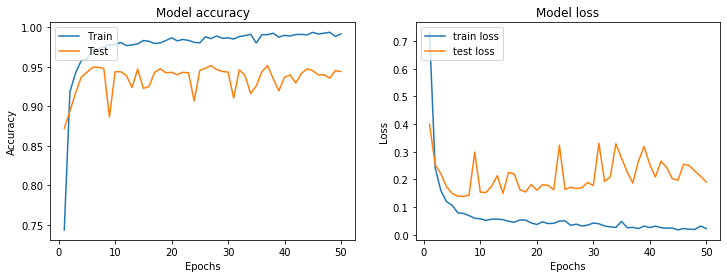

In [186]:
plot_accuracy_and_loss(history)

<h3>5. Model using Dropout and ADAM optimizer

In [ ]:
#selecting the optimizer
opt = keras.optimizers.Adam(learning_rate=0.001)
#Selecting the mertics
metrics = keras.metrics.CategoricalAccuracy()

In [194]:
model_d = model(opt,metrics,dropout=True)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 561)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 29)                16298     
_________________________________________________________________
dense_22 (Dense)             (None, 6)                 180       
Total params: 16,478
Trainable params: 16,478
Non-trainable params: 0
_________________________________________________________________


In [195]:
#Fitting the model on train and test data
history_d = model_d.fit(train_x, train_y_ohe, validation_data=(test_x,test_y_ohe), epochs = 50, batch_size = 64)

Epoch 1/50
115/115 [==============================] - 3s 19ms/step - loss: 0.9945 - categorical_accuracy: 0.8128 - val_loss: 0.3825 - val_categorical_accuracy: 0.8395
Epoch 2/50
115/115 [==============================] - 2s 13ms/step - loss: 0.2950 - categorical_accuracy: 0.8840 - val_loss: 0.2523 - val_categorical_accuracy: 0.9080
Epoch 3/50
115/115 [==============================] - 1s 12ms/step - loss: 0.2381 - categorical_accuracy: 0.9074 - val_loss: 0.2152 - val_categorical_accuracy: 0.9294
Epoch 4/50
115/115 [==============================] - 2s 18ms/step - loss: 0.1921 - categorical_accuracy: 0.9316 - val_loss: 0.1990 - val_categorical_accuracy: 0.9348
Epoch 5/50
115/115 [==============================] - 1s 13ms/step - loss: 0.1760 - categorical_accuracy: 0.9342 - val_loss: 0.2133 - val_categorical_accuracy: 0.9145
Epoch 6/50
115/115 [==============================] - 2s 14ms/step - loss: 0.1565 - categorical_accuracy: 0.9413 - val_loss: 0.1728 - val_categorical_accuracy: 0.940

Epoch 50/50
115/115 [==============================] - 2s 14ms/step - loss: 0.0689 - categorical_accuracy: 0.9744 - val_loss: 0.1539 - val_categorical_accuracy: 0.9393


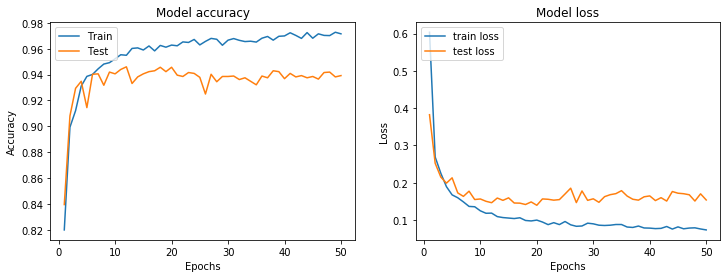

In [196]:
plot_accuracy_and_loss(history_d)

<h3>6. Model using SGD and dropout 

In [197]:
opt_sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD")

metrics = keras.metrics.CategoricalAccuracy()

In [198]:
model_sgd = model(opt_sgd,metrics,dropout=True)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 561)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 29)                16298     
_________________________________________________________________
dense_24 (Dense)             (None, 6)                 180       
Total params: 16,478
Trainable params: 16,478
Non-trainable params: 0
_________________________________________________________________


In [199]:
#Fitting the model on train and test data
history_sgd = model_sgd.fit(train_x, train_y_ohe, validation_data=(test_x,test_y_ohe), epochs = 50, batch_size = 64)

Epoch 1/50
115/115 [==============================] - 3s 20ms/step - loss: 1.5191 - categorical_accuracy: 0.3623 - val_loss: 0.9322 - val_categorical_accuracy: 0.6905
Epoch 2/50
115/115 [==============================] - 2s 18ms/step - loss: 0.8835 - categorical_accuracy: 0.6702 - val_loss: 0.6722 - val_categorical_accuracy: 0.8056
Epoch 3/50
115/115 [==============================] - 2s 15ms/step - loss: 0.6579 - categorical_accuracy: 0.7639 - val_loss: 0.5419 - val_categorical_accuracy: 0.8558
Epoch 4/50
115/115 [==============================] - 2s 14ms/step - loss: 0.5406 - categorical_accuracy: 0.8036 - val_loss: 0.4716 - val_categorical_accuracy: 0.8422
Epoch 5/50
115/115 [==============================] - 2s 22ms/step - loss: 0.4690 - categorical_accuracy: 0.8265 - val_loss: 0.4124 - val_categorical_accuracy: 0.8839
Epoch 6/50
115/115 [==============================] - 1s 12ms/step - loss: 0.4138 - categorical_accuracy: 0.8430 - val_loss: 0.4035 - val_categorical_accuracy: 0.868

Epoch 50/50
115/115 [==============================] - 2s 19ms/step - loss: 0.1343 - categorical_accuracy: 0.9499 - val_loss: 0.1526 - val_categorical_accuracy: 0.9484


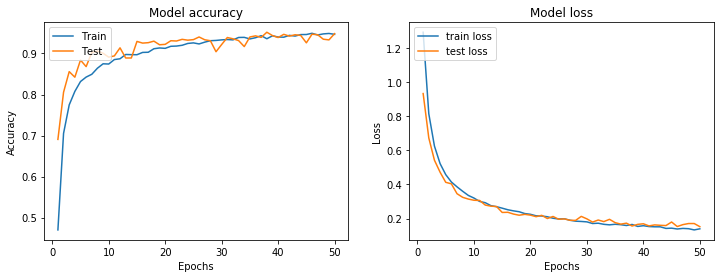

In [200]:
plot_accuracy_and_loss(history_sgd)

<h3>7. SGD with momentum and Dropout

In [201]:
opt_sgd_mom = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False, name="SGD")

metrics = keras.metrics.CategoricalAccuracy()

In [202]:
model_sgd_mom = model(opt_sgd_mom,metrics,dropout=True)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_2 (Dropout)          (None, 561)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 29)                16298     
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 180       
Total params: 16,478
Trainable params: 16,478
Non-trainable params: 0
_________________________________________________________________


In [204]:
#Fitting the model on train and test data
history_sgd_mom = model_sgd_mom.fit(train_x, train_y_ohe, validation_data=(test_x,test_y_ohe), epochs = 50, batch_size = 64)

Epoch 1/50
115/115 [==============================] - 2s 19ms/step - loss: 0.1786 - categorical_accuracy: 0.9242 - val_loss: 0.1532 - val_categorical_accuracy: 0.9440
Epoch 2/50
115/115 [==============================] - 2s 14ms/step - loss: 0.1629 - categorical_accuracy: 0.9301 - val_loss: 0.1556 - val_categorical_accuracy: 0.9362
Epoch 3/50
115/115 [==============================] - 2s 14ms/step - loss: 0.1481 - categorical_accuracy: 0.9402 - val_loss: 0.1635 - val_categorical_accuracy: 0.9359
Epoch 4/50
115/115 [==============================] - 3s 23ms/step - loss: 0.1404 - categorical_accuracy: 0.9445 - val_loss: 0.1730 - val_categorical_accuracy: 0.9355
Epoch 5/50
115/115 [==============================] - 2s 14ms/step - loss: 0.1412 - categorical_accuracy: 0.9426 - val_loss: 0.1513 - val_categorical_accuracy: 0.9410
Epoch 6/50
115/115 [==============================] - 2s 19ms/step - loss: 0.1550 - categorical_accuracy: 0.9361 - val_loss: 0.1814 - val_categorical_accuracy: 0.930

Epoch 50/50
115/115 [==============================] - 2s 14ms/step - loss: 0.0923 - categorical_accuracy: 0.9622 - val_loss: 0.1824 - val_categorical_accuracy: 0.9345


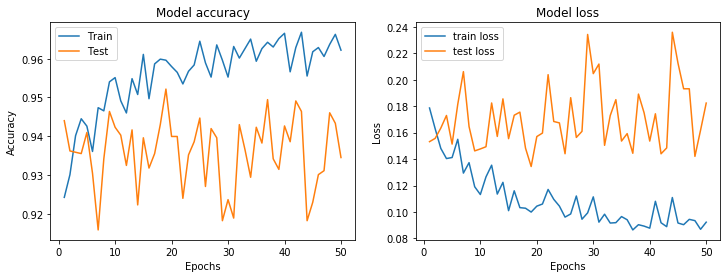

In [205]:
plot_accuracy_and_loss(history_sgd_mom)

<b>Conclusion : The SGD model has less overall accuracy but it is not overfitting, other models are overfitting

<h3>7. Saving the model

In [212]:
model_json = model_sgd_mom.to_json()
with open("model_sgd_mom.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_sgd_mom.save_weights("model_sgd_mom.h5")
print("Saved model to disk")

Saved model to disk


<h3>8. Loading the model

In [230]:
# load json and create model
json_file = open('model_sgd_mom.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_sgd_mom.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['CategoricalAccuracy'])
#score = loaded_model.evaluate(X, Y, verbose=0)
#print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


Loaded model from disk


In [228]:
#Predicting using the 
model_sgd_mom.predict(train_data.iloc[[2494],0:561].values)

array([[9.9972767e-01, 2.7219270e-04, 4.4825681e-09, 2.4931968e-10,
        9.9274288e-08, 2.6001554e-10]], dtype=float32)

In [231]:
#Predicting using the loaded model
loaded_model.predict(train_data.iloc[[2494],0:561].values)

array([[9.9972767e-01, 2.7219270e-04, 4.4825681e-09, 2.4931968e-10,
        9.9274288e-08, 2.6001554e-10]], dtype=float32)

In [232]:
loaded_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_2 (Dropout)          (None, 561)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 29)                16298     
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 180       
Total params: 16,478
Trainable params: 16,478
Non-trainable params: 0
_________________________________________________________________


<h1>Training an LSTM model